## Import the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
dataFrame911 = pd.read_csv('911.csv')

In [4]:
dataFrame911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [6]:
dataFrame911.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


## Q.1 : Top 5 zips who least called 911

In [11]:
dataFrame911['zip'].value_counts(ascending=True).head()

17555.0    1
19486.0    1
19457.0    1
19382.0    1
77316.0    1
Name: zip, dtype: int64

## Q.2 : Top 3 twps who most called 911

In [18]:
dataFrame911['twp'].value_counts().head(n=3)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
Name: twp, dtype: int64

## Q.3 : Any 10 addr who most called 911

In [21]:
dataFrame911['addr'].value_counts(sort=False).head(10)

SENATOR RD & TAFT RD                           9
WASHINGTON ST & BUTTONWOOD ALY                14
SWEDESFORD RD & GUTHRIE RD                    15
BEECHER AVE & CENTRAL AVE                     11
POTATO RD & OLD SKIPPACK RD                    5
E LEVERING MILL RD & CONSHOHOCKEN STATE RD     8
OLD GULPH RD & MT MORO RD                      4
LUCETTA ST & BROOK ALY                         2
TOWAMEN FIRE - BUST                            1
MAIN ST & RIVERSIDE AVE                        2
Name: addr, dtype: int64

## Convert timeStamp type from object datetime

In [26]:
dataFrame911['timeStamp'] = pd.to_datetime(dataFrame911['timeStamp'])

In [27]:
dataFrame911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        289240 non-null  float64       
 1   lng        289240 non-null  float64       
 2   desc       289240 non-null  object        
 3   zip        253942 non-null  float64       
 4   title      289240 non-null  object        
 5   timeStamp  289240 non-null  datetime64[ns]
 6   twp        289137 non-null  object        
 7   addr       289240 non-null  object        
 8   e          289240 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 19.9+ MB


## Q.4 : Unique Reasons to Call 911

In [29]:
# No of unique reasons
dataFrame911['title'].nunique()

131

In [39]:
dataFrame911['MainReason']  = dataFrame911['title'].apply(lambda title : title.split(':')[1])

In [40]:
dataFrame911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,MainReason,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [41]:
dataFrame911['Reason']  = dataFrame911['title'].apply(lambda title : title.split(':')[0])

In [42]:
dataFrame911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,MainReason,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [45]:
# Answer for Q.4
dataFrame911['MainReason'].value_counts().head()

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
Name: MainReason, dtype: int64

In [46]:
dataFrame911['Reason'].value_counts().head()

EMS        144362
Traffic    101889
Fire        42989
Name: Reason, dtype: int64

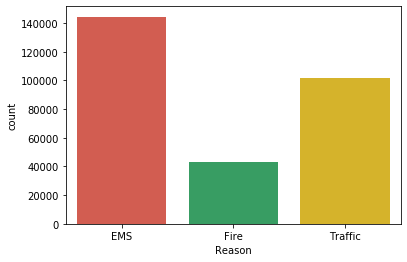

In [60]:
sb.countplot(x='Reason', data=dataFrame911, palette=['#e74c3c', '#27ae60', '#f1c40f'])

## Create columns : Hour, Month & Days

In [72]:
# Hour
dataFrame911['Hour'] = dataFrame911['timeStamp'].apply(lambda time : time.hour)

In [73]:
dataFrame911.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,MainReason,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3


In [74]:
# Month
dataFrame911['Month'] = dataFrame911['timeStamp'].apply(lambda time : time.month)

In [75]:
# Day
dataFrame911['Day'] = dataFrame911['timeStamp'].apply(lambda time : time.dayofweek)

In [76]:
dataFrame911.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,MainReason,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,3


In [79]:
# Day
dayName = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dataFrame911['DayName'] = dataFrame911['Day'].apply(lambda dayIndex : dayName[dayIndex])

In [80]:
dataFrame911.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,MainReason,Reason,Hour,Month,Day,DayName
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3,Wednesday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,3,Wednesday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,3,Wednesday


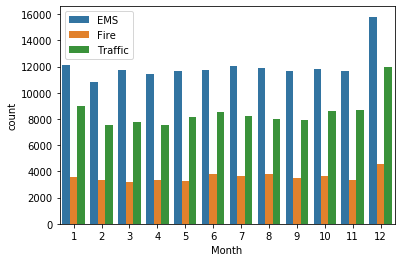

In [90]:
sb.countplot(x='Month', hue='Reason', data=dataFrame911)
plt.legend(loc='best')

## Pandas .groupby() usage

In [96]:
dataGroup = dataFrame911.groupby('DayName').mean()

In [97]:
dataGroup

,lat,lng,zip,e,Hour,Month,Day
DayName,,,,,,,
Friday,40.160121,-75.322098,19241.166267,1.0,13.157492,6.744080,5.0
Monday,40.159083,-75.313559,19232.025791,1.0,13.000823,6.685145,1.0
Saturday,40.161798,-75.322629,19235.366651,1.0,12.794119,6.613888,6.0
Sunday,40.158583,-75.314229,19234.536511,1.0,12.905018,6.634206,0.0
Thursday,40.158521,-75.315822,19234.627983,1.0,13.285576,6.802914,4.0
Tuesday,40.158072,-75.313704,19232.031518,1.0,13.093688,6.685581,2.0
Wednesday,40.158536,-75.315322,19236.770709,1.0,13.046957,6.725318,3.0


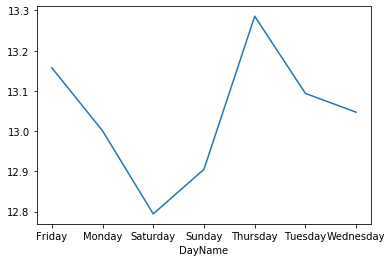

In [101]:
dataGroup['Hour'].plot()